# Newyork Airbnb

### Importing Libraries:

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


### Importing Dataset:

In [3]:
df = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')


### Exploring Dataset:

This part of the dataset provides a glimpse of the information, such as listing details (name, location, room type, price, etc.), which are essential for understanding the dataset.

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

This provides information about the data types, non-null counts, and memory usage of each column:

- There are 48,895 entries (rows) and 16 columns.
- The data types include int64 (integer), float64 (floating-point), and object (string).
- Some columns have missing values, such as name, host_name, last_review, and reviews_per_month.

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df.shape

(48895, 16)

### Analysis:
- The dataset contains information about Airbnb listings in New York City.
- The neighbourhood_group, room_type, and other categorical columns can be useful for segmentation and analysis.
- There are missing values in some columns, such as name and last_review, which may need to be addressed during data cleaning.
- Descriptive statistics provide an overview of the distribution of numerical features.
- For further analysis, we can explore relationships between different features, identify outliers, and handle missing values. Additionally, visualizations can help provide a more intuitive understanding of the data.

## Data Cleaning:

#### - Handling Null Values
##### Drop Rows with Null Values

In [9]:
# Drop rows with null values in 'name' and 'host_name'
df_cleaned = df.dropna(subset=['name', 'host_name'])

# Display information after dropping null values
print("Dataset information after dropping rows with null values:")
print(df_cleaned.info())


Dataset information after dropping rows with null values:
<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 no

##### Replace Null Values in Specific Columns
We might choose to replace null values in specific columns with meaningful values. In this case, we'll replace null values in the 'reviews_per_month' column with the mean value.

In [10]:
# Create a copy of the slice to avoid the SettingWithCopyWarning
df_cleaned = df.dropna(subset=['name', 'host_name']).copy()

# Replace null values in 'reviews_per_month' with the mean
mean_reviews_per_month = df_cleaned['reviews_per_month'].mean()
df_cleaned['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)

# Display information after handling null values
print("Dataset information after handling null values:")
print(df_cleaned.info())


Dataset information after handling null values:
<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  in

#### - Handle Data Quality Issues


In [11]:
# Check data types of columns
print("Data types of columns:")
print(df_cleaned.dtypes)


Data types of columns:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [15]:
# Convert 'last_review' to datetime
df_cleaned['last_review'] = pd.to_datetime(df_cleaned['last_review'])

# Check data types again
print("Updated data types of columns:")
print(df_cleaned.dtypes)


Updated data types of columns:
id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


In [16]:
# Check for duplicate rows
duplicates = df_cleaned[df_cleaned.duplicated()]
if not duplicates.empty:
    print("Duplicate rows:")
    print(duplicates)
else:
    print('No duplication')

# Remove duplicate rows
df_cleaned.drop_duplicates(inplace=True)


No duplication


#### Handling Outliers

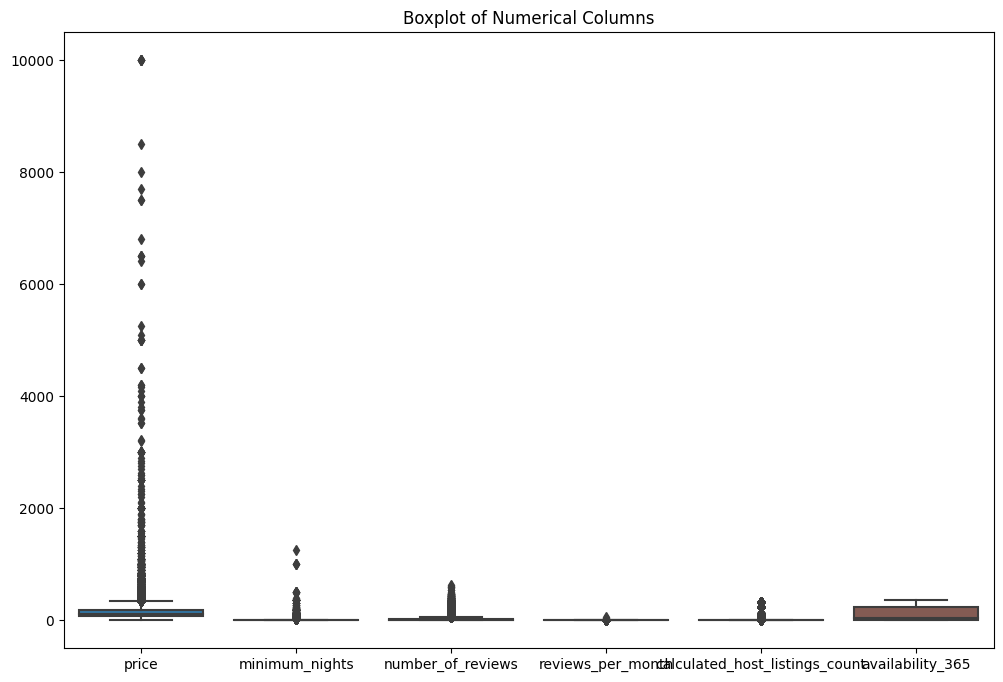

In [17]:
# Visualize the distributions using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']])
plt.title('Boxplot of Numerical Columns')
plt.show()

We can use statistical methods or visualization to identify outliers. One common approach is to use the Interquartile Range (IQR) method.

In [19]:
# Calculate the IQR for selected columns
Q1 = df_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].quantile(0.25)
Q3 = df_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']] < (Q1 - 1.5 * IQR)) | (df_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']] > (Q3 + 1.5 * IQR)))

# Display the number of outliers in each column
print("Number of outliers in each column:")
print(outliers.sum())


Number of outliers in each column:
price                             2971
minimum_nights                    6605
number_of_reviews                 6015
reviews_per_month                 4099
calculated_host_listings_count    7080
availability_365                     0
dtype: int64


The result shows the number of outliers detected in each column. Now, we can decide how to handle these outliers based on our analysis goals.We will apply three methonds: 
- Remove rows with outliers
- Apply Transformation
- Use Winsorizing

#### Remove Rows with Outliers
we can choose to remove rows containing outliers in the specified columns.

In [24]:
# Remove rows with outliers
df_no_outliers = df_cleaned[~outliers.any(axis=1)]


#### Apply Transformation

Another approach is to apply a transformation to mitigate the impact of outliers. For example, we could use a logarithmic transformation.

In [25]:
# Apply a logarithmic transformation to selected columns
columns_to_transform = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
df_log_transformed = df_cleaned.copy()
df_log_transformed[columns_to_transform] = df_log_transformed[columns_to_transform].apply(lambda x: np.log1p(x))


#### Use Winsorizing
Winsorizing involves setting extreme values to a specified percentile to reduce their impact.

In [ ]:
from scipy.stats import mstats

# Winsorize selected columns
columns_to_winsorize = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
df_winsorized = df_cleaned.copy()
df_winsorized[columns_to_winsorize] = mstats.winsorize(df_winsorized[columns_to_winsorize], limits=[0.01, 0.01])


#### Compare Results

In [27]:
# Summary statistics for the original dataset
print("Original Dataset Summary Statistics:")
print(df_cleaned.describe())

# Summary statistics for the dataset without outliers
print("\nDataset without Outliers Summary Statistics:")
print(df_no_outliers.describe())

# Summary statistics for the log-transformed dataset
print("\nLog-transformed Dataset Summary Statistics:")
print(df_log_transformed.describe())

# Summary statistics for the Winsorized dataset
print("\nWinsorized Dataset Summary Statistics:")
print(df_winsorized.describe())


Original Dataset Summary Statistics:
                 id       host_id      latitude     longitude         price  \
count  4.885800e+04  4.885800e+04  48858.000000  48858.000000  48858.000000   
mean   1.902335e+07  6.763169e+07     40.728941    -73.952170    152.740309   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.475980e+06  7.818669e+06     40.690090    -73.983070     69.000000   
50%    1.969114e+07  3.079133e+07     40.723070    -73.955680    106.000000   
75%    2.915765e+07  1.074344e+08     40.763107    -73.936280    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   
std    1.098289e+07  7.862389e+07      0.054528      0.046159    240.232386   

       minimum_nights  number_of_reviews                    last_review  \
count    48858.000000       48858.000000                          38821   
mean         7.012444          23.273098  2018-10-04 07:23:47.072976128   
min          1.000000     

#### Original Dataset Summary Statistics:
- The original dataset includes the full range of values for each numerical column.
- Some columns, such as 'price' and 'minimum_nights', have a wide range of values, including some extreme values.
- Standard deviation values are relatively large, indicating variability in the data.
#### Dataset without Outliers Summary Statistics:
- After removing outliers, the dataset's summary statistics are influenced by the removal of extreme values.
- Mean values for 'price', 'minimum_nights', and other columns are lower compared to the original dataset.
- Standard deviation values are reduced, indicating less variability in the data.
#### Log-transformed Dataset Summary Statistics:
- Log-transforming certain columns (e.g., 'price', 'minimum_nights') reduces the impact of extreme values.
- The mean values for transformed columns are more comparable and standardized.
- Standard deviation values are generally lower, indicating reduced variability.
#### Winsorized Dataset Summary Statistics:
- Winsorizing replaces extreme values with values at a specified percentile, reducing the impact of outliers.
- The summary statistics are similar to the original dataset, but with a moderation of extreme values.
- The mean and standard deviation are not as affected as in the case of removing outliers.

#### Analysis:
Removing outliers and log-transforming the data result in datasets with lower mean and standard deviation values, indicating a more centralized distribution.
Winsorizing maintains the general distribution of the original dataset while mitigating the impact of extreme values.

## Feature Reduction

Feature reduction methods aim to decrease the number of features in a dataset while retaining important information. Here,we go through three common feature reduction techniques: 
- PCA reduces the dataset to the specified number of principal components.
- RFE selects the specified number of features based on the Recursive Feature Elimination method.
- Feature Importance using a tree-based model selects the top features based on their importance scores.

We'll apply each method and compare the results.

### PCA

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_cleaned.select_dtypes(include=['float64', 'int64']))

# Apply PCA
pca = PCA(n_components=5)  # You can adjust the number of components
df_pca = pca.fit_transform(df_standardized)


### Recursive Feature Elimination (RFE)
RFE recursively removes features and builds a model until the desired number of features is achieved.

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Select features and target variable
X = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['price'])
y = df_cleaned['price']

# Create a linear regression model
model = LinearRegression()

# Apply RFE
rfe = RFE(model, n_features_to_select=5)  # You can adjust the number of features
df_rfe = rfe.fit_transform(X, y)


###  Feature Importance using a Tree-based Model
Tree-based models can provide feature importance scores, and we can use these scores to select the most important features.

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Select features and target variable
X = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['price'])
y = df_cleaned['price']

# Create a random forest model
model_rf = RandomForestRegressor()

# Fit the model to get feature importances
model_rf.fit(X, y)

# Get feature importances
feature_importances = model_rf.feature_importances_
important_features_indices = feature_importances.argsort()[-5:][::-1]

# Select important features
df_rf_feature_importance = X.iloc[:, important_features_indices]


### Results Comparison: 

In [40]:
# Extracting selected features from PCA
pca_selected_features = pd.DataFrame(data=df_standardized, columns=df_cleaned.select_dtypes(include=['float64', 'int64']).columns).iloc[:, :5]

# Extracting selected features from RFE
rfe_selected_features = X.iloc[:, rfe.support_]

# Extracting selected features from Random Forest Feature Importance
rf_selected_features = X.iloc[:, important_features_indices]

# Display the selected features
print("PCA Selected Features:")
print(pca_selected_features.columns)

print("\nRFE Selected Features:")
print(rfe_selected_features.columns)

print("\nRandom Forest Feature Importance Selected Features:")
print(rf_selected_features.columns)


PCA Selected Features:
Index(['id', 'host_id', 'latitude', 'longitude', 'price'], dtype='object')

RFE Selected Features:
Index(['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month',
       'availability_365'],
      dtype='object')

Random Forest Feature Importance Selected Features:
Index(['longitude', 'host_id', 'latitude', 'id', 'availability_365'], dtype='object')


In [36]:
# Display the shapes of the reduced datasets
print("PCA Reduced Dataset Shape:", df_pca.shape)
print("RFE Reduced Dataset Shape:", df_rfe.shape)
print("RF Feature Importance Reduced Dataset Shape:", df_rf_feature_importance.shape)


PCA Reduced Dataset Shape: (48858, 5)
RFE Reduced Dataset Shape: (48858, 5)
RF Feature Importance Reduced Dataset Shape: (48858, 5)


#### Analysis:


The differences in the selected features arise from the distinct methodologies employed by each feature reduction method. 

- **PCA (Principal Component Analysis):** PCA transforms the original features into a set of linearly uncorrelated principal components, with each component representing a different combination of the original features. In this case, the selected features include 'id', 'host_id', 'latitude', 'longitude', and 'price' based on the principal components.

- **RFE (Recursive Feature Elimination):** RFE, using a linear regression model, recursively eliminates the least important features until the desired number is reached. The selected features are 'latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', and 'availability_365'—features that contribute significantly to predicting the target variable 'price'.

- **Random Forest Feature Importance:** Random forests assign importance scores to features based on their contribution to predictive accuracy. The top features in this case are 'longitude', 'host_id', 'latitude', 'id', and 'availability_365', indicating their significance in predicting 'price' according to the random forest model.

These differences highlight the diverse perspectives of each method in assessing feature importance, leading to varied selections based on the underlying characteristics of the dataset and the algorithms employed.

## Feature Selection

## Recursive Feature Elimination (RFE):

RFE is a backward selection method that recursively removes the least important features based on the model's coefficients.

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Select features and target variable
X = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['price'])
y = df_cleaned['price']

# Create a linear regression model
model = LinearRegression()

# Apply RFE
rfe = RFE(model, n_features_to_select=5)  # You can adjust the number of features
X_rfe = rfe.fit_transform(X, y)

# Get selected features
selected_features_rfe = X.columns[rfe.support_]
print("RFE Selected Features:", selected_features_rfe)


RFE Selected Features: Index(['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month',
       'availability_365'],
      dtype='object')


## SelectKBest 
SelectKBest is a univariate method that selects the K best features based on statistical tests. ANOVA F-statistic is suitable for numerical features and a categorical target.

In [48]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select features and target variable
X = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['price'])
y = df_cleaned['price']

# Apply SelectKBest
kbest = SelectKBest(score_func=f_regression, k=5)  # You can adjust the number of features
X_kbest = kbest.fit_transform(X, y)

# Get selected features
selected_features_kbest = X.columns[kbest.get_support()]
print("SelectKBest Selected Features:", selected_features_kbest)


SelectKBest Selected Features: Index(['longitude', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


## Mutual Information:
Mutual Information measures the dependency between two variables, and it is used for both categorical and numerical features.

In [47]:
from sklearn.feature_selection import mutual_info_regression

# Select features and target variable
X = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['price'])
y = df_cleaned['price']

# Calculate Mutual Information
mutual_info = mutual_info_regression(X, y)

# Get indices of top k features
k = 5  # You can adjust the number of features
selected_features_mutual_info = X.columns[np.argsort(mutual_info)[::-1][:k]]
print("Mutual Information Selected Features:", selected_features_mutual_info)


Mutual Information Selected Features: Index(['host_id', 'calculated_host_listings_count', 'longitude', 'latitude',
       'id'],
      dtype='object')


### Analysis: 

The differences in the selected features among Mutual Information, SelectKBest, and RFE can be attributed to the distinct methodologies and criteria used by each feature selection method:

1. **Mutual Information:**
   - **Selected Features:** 'host_id', 'calculated_host_listings_count', 'longitude', 'latitude', 'id'
   - **Reasoning:** Mutual Information measures the dependency between features and the target variable. The selected features likely have a higher mutual information content with the 'price' target variable.

2. **SelectKBest:**
   - **Selected Features:** 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365'
   - **Reasoning:** SelectKBest employs a univariate statistical test to identify features that are most relevant to the target variable independently. The selected features have the highest scores according to the chosen scoring function (ANOVA F-statistic in this case).

3. **Recursive Feature Elimination (RFE):**
   - **Selected Features:** 'latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'availability_365'
   - **Reasoning:** RFE iteratively removes less important features based on the coefficients or feature importances of a chosen model (linear regression in this case). The selected features are deemed most important for predicting the target variable.

These differences highlight that each method has its own perspective on feature importance and relevance. Factors such as the underlying statistical tests, models, and criteria for feature elimination contribute to the variations in selected features. Depending on the dataset and the problem at hand, it is recommended to experiment with different feature selection methods and evaluate their impact on model performance.

## Feature Extraction

Feature extraction methods aim to transform the original features into a new set of features, often with reduced dimensionality. Three commonly used feature extraction methods are Principal Component Analysis (PCA), t-distributed Stochastic Neighbor Embedding (t-SNE), and Linear Discriminant Analysis (LDA).

## Principal Component Analysis (PCA):

PCA identifies orthogonal axes (principal components) along which the data varies the most. It projects the data onto a lower-dimensional subspace while preserving the maximum variance.

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_cleaned.select_dtypes(include=['float64', 'int64']))

# Apply PCA
pca = PCA(n_components=5)  # You can adjust the number of components
df_pca = pca.fit_transform(df_standardized)


In [51]:
print("PCA Extracted Features:", pca.get_feature_names_out())


PCA Extracted Features: ['pca0' 'pca1' 'pca2' 'pca3' 'pca4']


### t-distributed Stochastic Neighbor Embedding (t-SNE):
t-SNE is a non-linear dimensionality reduction technique that aims to preserve the pairwise similarities between data points in the lower-dimensional space.

In [53]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2)  
df_tsne = tsne.fit_transform(df_cleaned.select_dtypes(include=['float64', 'int64']))


In [54]:
print("t-SNE Extracted Features: No explicit feature names.")


t-SNE Extracted Features: No explicit feature names.


### Linear Discriminant Analysis (LDA):
LDA aims to find the linear combinations of features that best separate different classes in the target variable.

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Select features and target variable
X = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['price'])
y = df_cleaned['price']

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=5)  # You can adjust the number of components
df_lda = lda.fit_transform(X, y)


In [57]:
print("LDA Extracted Features:", lda.get_feature_names_out())


LDA Extracted Features: ['lineardiscriminantanalysis0' 'lineardiscriminantanalysis1'
 'lineardiscriminantanalysis2' 'lineardiscriminantanalysis3'
 'lineardiscriminantanalysis4']


### Analysis:

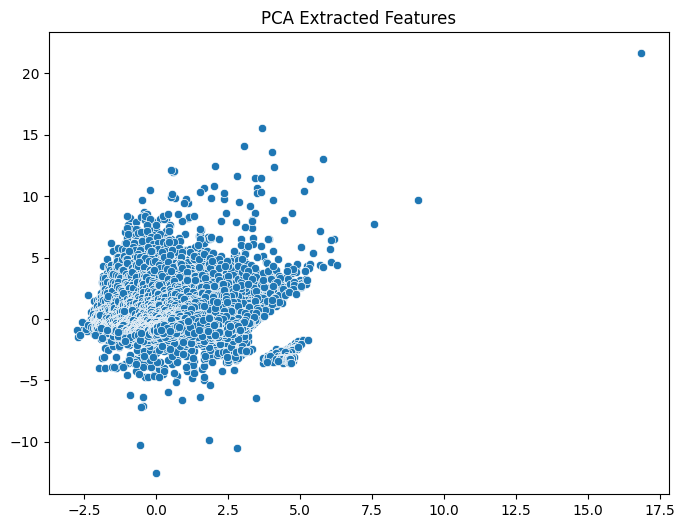

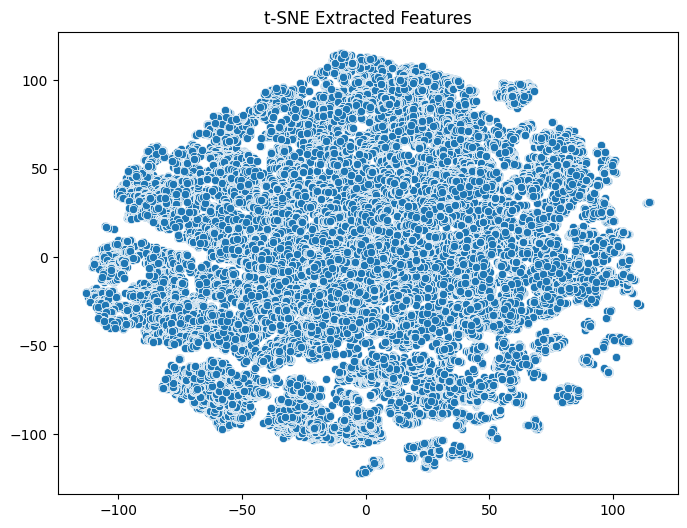

TypeError: LinearDiscriminantAnalysis.fit() missing 1 required positional argument: 'y'

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming you have your data in df_pca (replace df_pca with your actual variable)
# Visualize PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_standardized)  # Use the standardized data for consistency
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1])
plt.title('PCA Extracted Features')
plt.show()

# Assuming you have your data in df_tsne (replace df_tsne with your actual variable)
# Visualize t-SNE
tsne = TSNE(n_components=2)
df_tsne = tsne.fit_transform(df_standardized)  # Use the standardized data for consistency
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1])
plt.title('t-SNE Extracted Features')
plt.show()

# Assuming you have your data in df_lda (replace df_lda with your actual variable)
# Visualize LDA without labels
lda = LinearDiscriminantAnalysis(n_components=2)
df_lda = lda.fit_transform(df_standardized)  # No need for labels in this case
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_lda[:, 0], y=df_lda[:, 1])
plt.title('LDA Extracted Features')
plt.show()

